<a href="https://colab.research.google.com/github/OksanaBut77/TFM/blob/main/TFM_farmacias_v5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df_cambio_cl=pd.read_csv('/content/drive/MyDrive/TFM/df_member_cluster_change KNN2.csv')
df_cambio_cl.head()

,depart_id,card_id,member_class,last_consume_time,card_type,define_class,is_suff,level,birthday,consume_level,...,age,Recency,point_sqrt,Cluster KMeans,Cluster Agglom,Cluster KMeans 1,Cluster KMeans 2,Cluster KMeans 3,Cluster KMeans 4,cluster_change
0,270297,1936560,217,2019-06-06 19:11:59.999999939,0.0,170,0,2,1968-12-01,1,...,56.000000,829,0.0,0,2,NaN,NaN,NaN,0.0,1
1,270297,3208730,456,2020-01-22 09:18:15.000000000,0.0,426,0,2,1954-07-24,1,...,70.000000,599,0.0,1,2,NaN,NaN,NaN,1.0,1
2,270155,4053650,3091,2021-11-13 09:57:18.000000000,0.0,578,0,3,2016-09-02,1,...,38.463297,14,0.0,2,2,NaN,NaN,NaN,1.0,1
3,270155,4053950,2624,2021-12-05 18:49:25.000000000,0.0,287,0,3,1951-09-13,1,...,73.000000,8,0.0,1,2,NaN,NaN,NaN,1.0,1
4,270297,4133810,435,2016-03-16 09:36:00.000000129,0.0,170,0,2,2015-12-28,1,...,38.463297,1450,0.0,0,1,NaN,NaN,0.0,0.0,0


In [ ]:
df_cambio_cl.columns

Index(['depart_id', 'card_id', 'member_class', 'last_consume_time',
       'card_type', 'define_class', 'is_suff', 'level', 'birthday',
       'consume_level', 'point', 'updatetime', 'sex', 'createdate', 'age',
       'Recency', 'point_sqrt', 'Cluster KMeans', 'Cluster Agglom',
       'Cluster KMeans 1', 'Cluster KMeans 2', 'Cluster KMeans 3',
       'Cluster KMeans 4', 'cluster_change'],
      dtype='object')

# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# exluir columnas no relevantrs
X = df_cambio_cl.drop(columns=['depart_id', 'card_id', 'birthday',
        'updatetime', 'createdate', 'point_sqrt', 'Cluster KMeans', 'Cluster Agglom',
       'Cluster KMeans 1', 'Cluster KMeans 2', 'Cluster KMeans 3',
       'Cluster KMeans 4', 'cluster_change', "last_consume_time"])

# Asegurémonos de que las variables categóricas están codificadas como numéricas
# Usaremos dummies para las variables categóricas como 'sex', 'card_type', etc.
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df_cambio_cl['cluster_change']

In [ ]:
# NaN
print(X.isna().sum())

member_class     0
card_type        0
define_class     0
is_suff          0
level            0
consume_level    0
point            0
sex              0
age              0
Recency          0
dtype: int64


In [ ]:
# Dividir los datos entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Entrenamiento
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

#  predicciones
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase positiva (1)

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)

print(f'ROC AUC: {roc_auc:.4f}')
print(classification_report(y_test, y_pred))

ROC AUC: 0.9525
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1803
           1       0.83      0.91      0.87      1197

    accuracy                           0.89      3000
   macro avg       0.88      0.89      0.89      3000
weighted avg       0.90      0.89      0.89      3000



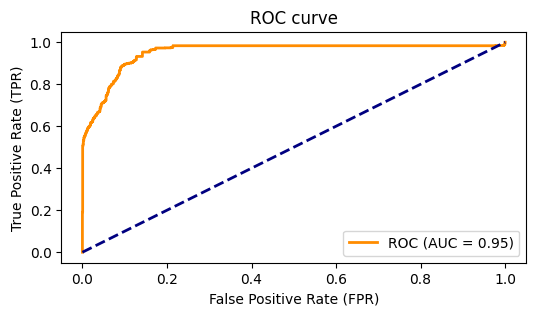

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (sin discriminación)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

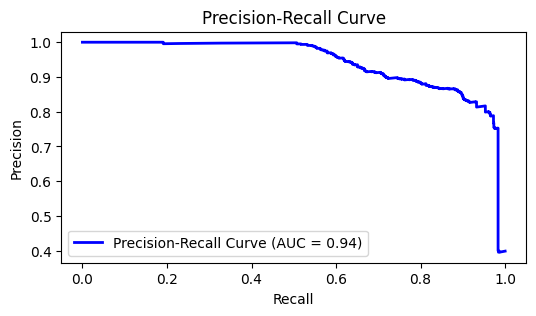

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calcular la curva de precisión-recuperación
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

# Calcular el AUC para la curva de precisión-recuperación
pr_auc = average_precision_score(y_test, y_prob)

# Graficar la curva de precisión-recuperación Area under Curve
plt.figure(figsize=(6, 3))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Predicción de la probabilidad de cambio de cluster
nuevos_datos = X_test_scaled
probabilidad_cambio = log_reg.predict_proba(nuevos_datos)[:, 1]

print(probabilidad_cambio)

[0.01761102 0.27059397 0.66171822 ... 0.5714094  0.99962144 0.37261041]


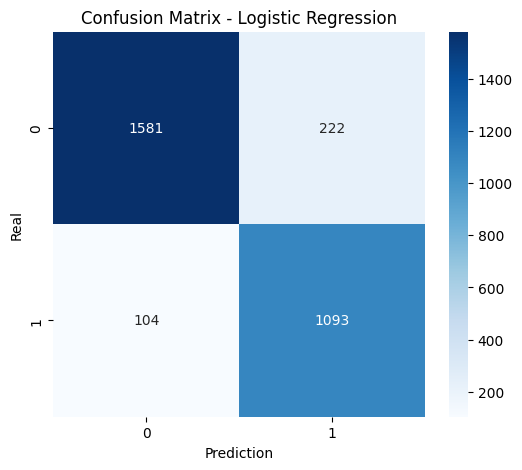

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#  matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística con regularización L2 (Ridge)
log_reg_ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_ridge.fit(X_train_scaled, y_train)

# Evaluar precisión
train_accuracy_ridge = log_reg_ridge.score(X_train_scaled, y_train)
test_accuracy_ridge = log_reg_ridge.score(X_test_scaled, y_test)

print(f'Precisión con regularización L2 (Ridge) en entrenamiento: {train_accuracy_ridge:.4f}')
print(f'Precisión con regularización L2 (Ridge) en prueba: {test_accuracy_ridge:.4f}')


Precisión con regularización L2 (Ridge) en entrenamiento: 0.8916
Precisión con regularización L2 (Ridge) en prueba: 0.8913


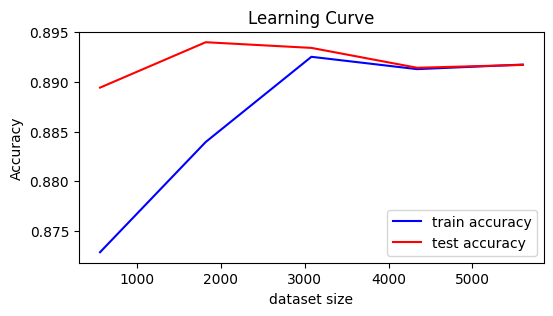

In [ ]:
from sklearn.model_selection import learning_curve

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Promediar las puntuaciones de precisión
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(6, 3))
plt.plot(train_sizes, train_mean, label='train accuracy', color='b')
plt.plot(train_sizes, test_mean, label='test accuracy', color='r')
plt.xlabel('dataset size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

# Calcular la precisión
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

ROC AUC: 0.9835
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1803
           1       0.88      0.95      0.91      1197

    accuracy                           0.93      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [ ]:
# importancia de las características
importances = rf.feature_importances_

# DataFrame con las importancias
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar las características por su importancia (de mayor a menor)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

         Feature  Importance
6          point    0.261652
1      card_type    0.183538
0   member_class    0.154625
8            age    0.146708
9        Recency    0.102537
4          level    0.069464
2   define_class    0.038704
7            sex    0.023926
5  consume_level    0.018772
3        is_suff    0.000074


In [ ]:
# Filtrar las 10 características más importantes
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)


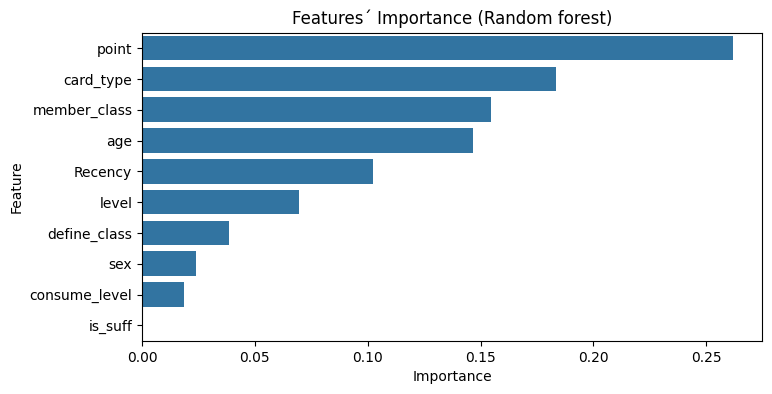

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Features´ Importance (Random forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

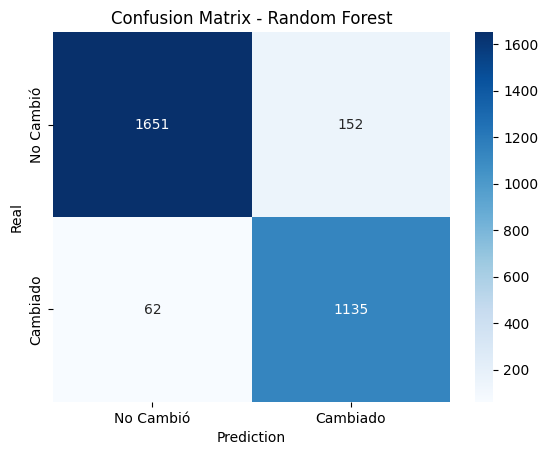

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cambió', 'Cambiado'], yticklabels=['No Cambió', 'Cambiado'])
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion Matrix - Random Forest')
plt.show()

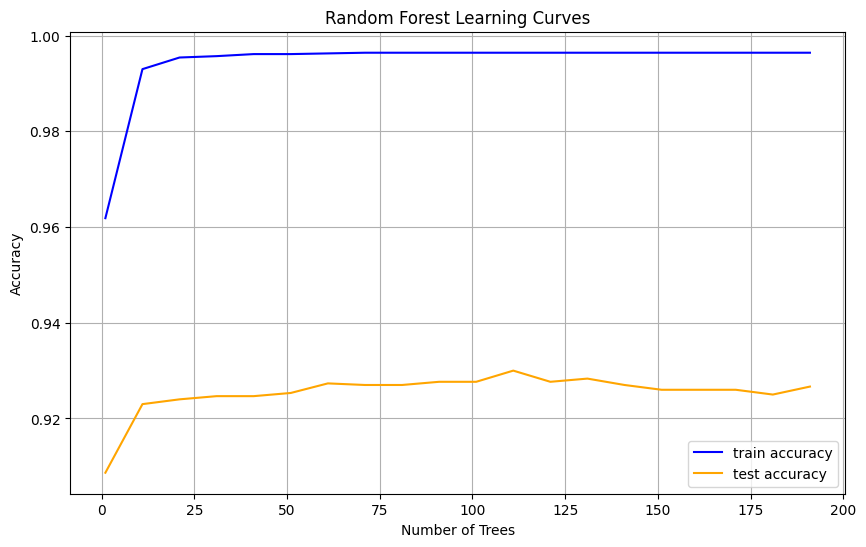

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Variables para almacenar resultados
train_accuracy = []
test_accuracy = []

# Entrenar el modelo con un número creciente de árboles
n_estimators_range = range(1, 201, 10)

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Predecir y evaluar precisión
    train_accuracy.append(accuracy_score(y_train, rf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, rf.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracy, label='train accuracy', color='blue')
plt.plot(n_estimators_range, test_accuracy, label='test accuracy', color='orange')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Shapley value

In [ ]:
!pip install shap

In [ ]:
import shap
# Continuar desde donde se produjo el error
print("\nCalculando valores de Shapley (SHAP values)...")

# Crear un objeto explicador SHAP
explainer = shap.TreeExplainer(rf)

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test_scaled)

# Imprimir información para diagnóstico
print(f"Tipo de shap_values: {type(shap_values)}")
print(f"Forma de shap_values: {shap_values.shape}")

# Para este formato específico (3000, 10, 2), necesitamos extraer los valores para la clase positiva
# Este formato parece ser: [muestras, características, clases]
# Extraemos los valores para la clase positiva (índice 1) de todas las muestras y características
shap_values_class1 = shap_values[:, :, 1]
print(f"Forma de shap_values para clase positiva: {shap_values_class1.shape}")

# Calcular importancia de características basada en valores SHAP absolutos para la clase positiva
shap_importance = np.abs(shap_values_class1).mean(axis=0)
print(f"Forma de shap_importance: {shap_importance.shape}")

# Crear DataFrame con importancias SHAP
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Value': shap_importance
})

# Ordenar por importancia de SHAP
shap_df = shap_df.sort_values(by='SHAP Value', ascending=False)
print("\nTop 10 características según valores SHAP:")
print(shap_df.head(10))

# Visualizar los valores SHAP
print("\nGenerando visualizaciones SHAP...")

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_class1, X_test_scaled, feature_names=X.columns.tolist(), show=False)
plt.tight_layout()
plt.savefig('shap_summary_plot.png')
plt.close()

# Dependence plot para la característica más importante según SHAP
most_important_feature = shap_df.iloc[0]['Feature']
feature_idx = list(X.columns).index(most_important_feature)
plt.figure(figsize=(10, 6))
shap.dependence_plot(feature_idx, shap_values_class1, X_test_scaled,
                    feature_names=X.columns.tolist(), show=False)
plt.tight_layout()
plt.savefig(f'shap_dependence_plot_{most_important_feature}.png')
plt.close()

print(f"\nVisualizaciones SHAP guardadas. La característica más importante según SHAP es: {most_important_feature}")

# Comparar rankings de importancia
print("\nComparación de rankings de importancia:")
comparison_df = pd.merge(importance_df, shap_df, on='Feature')
comparison_df = comparison_df.rename(columns={
    'Importance': 'Random Forest Importance',
    'SHAP Value': 'SHAP Importance'
})
comparison_df['RF Rank'] = comparison_df['Random Forest Importance'].rank(ascending=False)
comparison_df['SHAP Rank'] = comparison_df['SHAP Importance'].rank(ascending=False)
comparison_df['Rank Difference'] = abs(comparison_df['RF Rank'] - comparison_df['SHAP Rank'])
comparison_df = comparison_df.sort_values(by='SHAP Importance', ascending=False)

print(comparison_df.head(10))

# Explicación para un ejemplo individual (ej. el primer ejemplo del conjunto de prueba)
sample_idx = 0
print(f"\nExplicación SHAP para el ejemplo #{sample_idx}:")

# Extraer valores SHAP para el ejemplo específico y la clase positiva
sample_shap_values = shap_values[sample_idx, :, 1]

sample_explanation = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Value': sample_shap_values
})
sample_explanation = sample_explanation.sort_values(by='SHAP Value', ascending=False)
print(sample_explanation.head(10))

# Visualizar la explicación para este ejemplo específico
plt.figure(figsize=(10, 6))
shap.force_plot(
    explainer.expected_value[1],  # Valor base para la clase positiva
    sample_shap_values,
    X_test_scaled[sample_idx],
    feature_names=X.columns.tolist(),
    matplotlib=True,
    show=False
)
plt.tight_layout()
plt.savefig('shap_force_plot_example.png')
plt.close()

# Generar SHAP waterfall plot para el ejemplo
plt.figure(figsize=(10, 12))
shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_values,
        base_values=explainer.expected_value[1],
        data=X_test_scaled[sample_idx],
        feature_names=X.columns.tolist()
    ),
    show=False
)
plt.tight_layout()
plt.savefig('shap_waterfall_plot_example.png')
plt.close()

print("\nVisualizaciones de explicación individual guardadas.")

# Generar una matriz de dependencia para ver las interacciones entre características
plt.figure(figsize=(12, 10))
top_features = shap_df['Feature'].head(6).tolist()
top_indices = [list(X.columns).index(feat) for feat in top_features]

# Crear una matriz de gráficos de dependencia
shap.dependence_plot(
    top_indices,
    shap_values_class1,
    X_test_scaled,
    feature_names=X.columns.tolist(),
    clustering=shap.utils.hclust(X_test_scaled, top_indices),
    show=False
)
plt.tight_layout()
plt.savefig('shap_interaction_matrix.png')
plt.close()

print("\nMatriz de interacción SHAP guardada.")

# Análisis adicional: Compara la importancia entre diferentes grupos
if 'sex' in X.columns:
    sex_idx = list(X.columns).index('sex')
    sex_values = X_test_scaled[:, sex_idx]
    unique_groups = np.unique(sex_values)

    if len(unique_groups) > 1:
        print("\nImportancia de características por grupo (sex):")
        plt.figure(figsize=(12, 8))

        for group_val in unique_groups:
            # Filtrar índices por grupo
            group_indices = np.where(sex_values == group_val)[0]
            if len(group_indices) > 0:
                # Calcular importancia para este grupo
                group_importance = np.abs(shap_values_class1[group_indices]).mean(axis=0)
                group_df = pd.DataFrame({
                    'Feature': X.columns,
                    f'SHAP Value (Group {group_val})': group_importance
                })
                group_df = group_df.sort_values(by=f'SHAP Value (Group {group_val})', ascending=False)
                print(f"\nGrupo {group_val}:")
                print(group_df.head(5))

        print("\nComparación de importancia completada.")

print("\nAnálisis SHAP completado.")


Calculando valores de Shapley (SHAP values)...
Tipo de shap_values: <class 'numpy.ndarray'>
Forma de shap_values: (3000, 10, 2)
Forma de shap_values para clase positiva: (3000, 10)
Forma de shap_importance: (10,)

Top 10 características según valores SHAP:
         Feature  SHAP Value
9        Recency    0.153308
6          point    0.109875
1      card_type    0.081391
4          level    0.071230
7            sex    0.030387
0   member_class    0.026031
8            age    0.019284
5  consume_level    0.011560
2   define_class    0.006119
3        is_suff    0.000036

Generando visualizaciones SHAP...

Visualizaciones SHAP guardadas. La característica más importante según SHAP es: Recency

Comparación de rankings de importancia:
         Feature  Random Forest Importance  SHAP Importance  RF Rank  \
4        Recency                  0.102537         0.153308      5.0   
0          point                  0.261652         0.109875      1.0   
1      card_type                  0.183538

ValueError: Found input variables with inconsistent numbers of samples: [3000, 6]

In [ ]:
# Continuar desde donde se produjo el error
# El código anterior funcionó bien hasta la parte de la matriz de dependencia

# Análisis de valores SHAP - versión final corregida
print("\nGenerando visualizaciones adicionales de SHAP...")

# Visualizar dependencias individuales para las características más importantes
print("Generando gráficos de dependencia individuales...")
top_features = shap_df['Feature'].head(5).tolist()

for feature in top_features:
    feature_idx = list(X.columns).index(feature)
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(
        feature_idx,
        shap_values_class1,
        X_test_scaled,
        feature_names=X.columns.tolist(),
        show=False
    )
    plt.title(f'SHAP Dependence Plot: {feature}')
    plt.tight_layout()
    plt.savefig(f'shap_dependence_{feature}.png')
    plt.close()

# Generar un SHAP Decision Plot para varios ejemplos
print("Generando gráfico de decisión SHAP...")
# Tomar una muestra pequeña de ejemplos para el gráfico de decisión
sample_size = min(20, len(X_test_scaled))
sample_indices = np.random.choice(len(X_test_scaled), sample_size, replace=False)

plt.figure(figsize=(12, 8))
try:
    shap.decision_plot(
        explainer.expected_value[1],  # Valor base para la clase positiva
        shap_values_class1[sample_indices],
        X_test_scaled[sample_indices],
        feature_names=X.columns.tolist(),
        show=False
    )
    plt.tight_layout()
    plt.savefig('shap_decision_plot.png')
except Exception as e:
    print(f"Error al generar el gráfico de decisión: {e}")
plt.close()

# Crear un heatmap personalizado de las importancias SHAP
print("Creando heatmap de importancias SHAP...")
import seaborn as sns

plt.figure(figsize=(12, 10))
# Seleccionar un subconjunto de ejemplos para mejorar la legibilidad
n_samples = min(50, shap_values_class1.shape[0])
sample_idx = np.random.choice(shap_values_class1.shape[0], n_samples, replace=False)

# Ordenar características por importancia SHAP
features_by_importance = shap_df['Feature'].tolist()
feature_indices = [list(X.columns).index(feat) for feat in features_by_importance]

# Crear una matriz de valores SHAP para el heatmap
heatmap_data = shap_values_class1[sample_idx][:, feature_indices]

# Crear el heatmap
sns.heatmap(
    heatmap_data,
    cmap='RdBu_r',
    center=0,
    yticklabels=False,
    xticklabels=[features_by_importance[i] for i in range(len(feature_indices))],
    cbar_kws={'label': 'SHAP Value'}
)
plt.title('SHAP Values Heatmap (sample of instances)')
plt.tight_layout()
plt.savefig('shap_heatmap.png')
plt.close()

# Análisis adicional: distribución de valores SHAP por característica
print("Analizando distribución de valores SHAP...")
plt.figure(figsize=(15, 10))

# Crear subplots para las características más importantes
top_n = min(6, len(features_by_importance))
fig, axes = plt.subplots(nrows=(top_n+1)//2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_by_importance[:top_n]):
    feature_idx = list(X.columns).index(feature)
    # Obtener valores SHAP para esta característica
    feature_shap_values = shap_values_class1[:, feature_idx]

    # Crear histograma/KDE de valores SHAP
    sns.histplot(feature_shap_values, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de valores SHAP: {feature}')
    axes[i].set_xlabel('SHAP Value')
    axes[i].set_ylabel('Frecuencia')

# Ajustar layout
plt.tight_layout()
plt.savefig('shap_distributions.png')
plt.close()

# Crear un gráfico de barras para comparar importancias RF vs SHAP
print("Comparando importancias RF vs SHAP...")
plt.figure(figsize=(12, 8))

# Crear un DataFrame para la comparación
comparison_data = comparison_df.sort_values(by='SHAP Importance', ascending=True).tail(10)

# Gráfico de barras
comparison_data.plot(
    x='Feature',
    y=['Random Forest Importance', 'SHAP Importance'],
    kind='barh',
    figsize=(12, 8)
)
plt.title('Comparación de importancias: Random Forest vs SHAP')
plt.xlabel('Importancia')
plt.tight_layout()
plt.savefig('importance_comparison.png')
plt.close()

# Analizar la relación entre valores de características y valores SHAP
print("Analizando relación entre valores de características y valores SHAP...")
most_important_feature = shap_df.iloc[0]['Feature']
most_important_idx = list(X.columns).index(most_important_feature)

plt.figure(figsize=(10, 6))
# Crear un scatter plot: valor de característica vs valor SHAP
plt.scatter(
    X_test_scaled[:, most_important_idx],
    shap_values_class1[:, most_important_idx],
    alpha=0.5
)
plt.title(f'Relación entre valores de {most_important_feature} y sus valores SHAP')
plt.xlabel(f'Valor de {most_important_feature} (escalado)')
plt.ylabel('Valor SHAP')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'shap_feature_relationship_{most_important_feature}.png')
plt.close()

# Resumen final: guardar las importancias en un archivo CSV
print("\nGuardando resultados en archivos CSV...")

# Guardar importancias comparativas
comparison_df.to_csv('feature_importance_comparison.csv', index=False)

# Guardar valores SHAP para todos los ejemplos (puede ser un archivo grande)
shap_values_df = pd.DataFrame(
    shap_values_class1,
    columns=X.columns
)
# Añadir la predicción y la clase real si están disponibles
shap_values_df['predicted_probability'] = y_prob
shap_values_df['predicted_class'] = y_pred
shap_values_df['actual_class'] = y_test.reset_index(drop=True)
shap_values_df.to_csv('all_shap_values.csv', index=False)

print("\nAnálisis SHAP completado. Se han generado múltiples visualizaciones y archivos CSV.")

# Mostrar un resumen de los hallazgos clave
print("\nHallazgos clave del análisis SHAP:")
print(f"1. La característica más importante según SHAP es: {shap_df.iloc[0]['Feature']}")
print(f"2. La característica más importante según Random Forest es: {importance_df.iloc[0]['Feature']}")

# Identificar características donde hay mayor discrepancia entre RF y SHAP
discrepancy_df = comparison_df.sort_values(by='Rank Difference', ascending=False)
if not discrepancy_df.empty and discrepancy_df.iloc[0]['Rank Difference'] > 0:
    print(f"3. Mayor discrepancia entre RF y SHAP: {discrepancy_df.iloc[0]['Feature']} (diferencia de {discrepancy_df.iloc[0]['Rank Difference']} posiciones)")

# Imprimir conclusión
print("\nLos valores Shapley proporcionan una interpretación más detallada del modelo, mostrando")
print("cómo cada característica contribuye a las predicciones individuales, a diferencia de la")
print("importancia global de características de Random Forest.")


Generando visualizaciones adicionales de SHAP...
Generando gráficos de dependencia individuales...
Generando gráfico de decisión SHAP...
Creando heatmap de importancias SHAP...
Analizando distribución de valores SHAP...
Comparando importancias RF vs SHAP...
Analizando relación entre valores de características y valores SHAP...

Guardando resultados en archivos CSV...

Análisis SHAP completado. Se han generado múltiples visualizaciones y archivos CSV.

Hallazgos clave del análisis SHAP:
1. La característica más importante según SHAP es: Recency
2. La característica más importante según Random Forest es: point
3. Mayor discrepancia entre RF y SHAP: Recency (diferencia de 4.0 posiciones)

Los valores Shapley proporcionan una interpretación más detallada del modelo, mostrando
cómo cada característica contribuye a las predicciones individuales, a diferencia de la
importancia global de características de Random Forest.


---------------------
---------------------


# Conclusiones